In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Graphing tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
filepath = '/kaggle/input/patents-granted-india-2022/application_details_granted_2022.csv'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patents-granted-india-2022/application_details_granted_2022.csv


In [2]:
df = pd.read_csv(filepath)

In [3]:
df.head(10)

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y
0,01/2022,07/01/2022,Delhi,DIVISIONAL CONVENTION APPLICATION,1004/DEL/2015,10/04/2015,VOLTAGE CONTROL FOR WIND GENERATORS,ELECTRICAL,19.0,6.0,19/04/2023
1,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10143/DELNP/2011,22/12/2011,"""ROTOR CAN""",ELECTRICAL,23.0,15.0,19/04/2023
2,01/2022,07/01/2022,Chennai,ORDINARY APPLICATION,102/CHE/2010,15/02/2010,SUPER CONDUCTOR LIGHTNING DIVERTOR,ELECTRICAL,17.0,10.0,19/04/2023
3,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10205/DELNP/2015,02/11/2015,FIBRINOGEN BASED TISSUE ADHESIVE PATCHES,BIOCHEMISTRY,35.0,62.0,19/04/2023
4,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10296/DELNP/2011,27/12/2011,"""IMPLANTABLE DRUG DELIVERY DEVICES AND METHODS...",BIOMEDICAL,73.0,25.0,19/04/2023
5,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10353/DELNP/2013,02/12/2013,GAS TURBINE DIFFUSER BLOWING METHOD AND CORRES...,MECHANICAL,20.0,11.0,19/04/2023
6,01/2022,07/01/2022,Kolkata,ORDINARY APPLICATION,1056/KOL/2013,11/09/2013,'AN IMPROVED GAS FIRED DUCT BURNER FOR EFFICIE...,MECHANICAL,16.0,1.0,19/04/2023
7,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10625/DELNP/2015,19/11/2015,CLUSTER HEAD SELECTION IN A COMMUNICATIONS NET...,COMMUNICATION,34.0,25.0,19/04/2023
8,01/2022,07/01/2022,Kolkata,PCT NATIONAL PHASE APPLICATION,1078/KOLNP/2015,20/04/2015,APPARATUS AND METHOD FOR CUTTING PIPES OF THER...,MECHANICAL,30.0,16.0,19/04/2023
9,01/2022,07/01/2022,Delhi,PCT NATIONAL PHASE APPLICATION,10908/DELNP/2015,30/11/2015,METHOD FOR FORMING BLANK AND METHOD FOR DETERM...,MECHANICAL,60.0,18.0,19/04/2023


In [4]:
y = df.NO_OF_PAGES

features = ['IPO_LOCATION','FIELD_OF_INVENTION']
X = df[features]
print(X)

      IPO_LOCATION FIELD_OF_INVENTION
0            Delhi         ELECTRICAL
1            Delhi         ELECTRICAL
2          Chennai         ELECTRICAL
3            Delhi       BIOCHEMISTRY
4            Delhi         BIOMEDICAL
...            ...                ...
30494        Delhi        ELECTRONICS
30495        Delhi      COMMUNICATION
30496      Kolkata           COMPUTER
30497       Mumbai         MECHANICAL
30498        Delhi         MECHANICAL

[30499 rows x 2 columns]


In [5]:
df.isnull().sum()

PUBLICATION_NUMBER        0
PUBLICATION_DATE          0
IPO_LOCATION              0
APPLICATION_TYPE_DESC     0
APPLICATION_NUMBER        0
DATE_OF_FILING            0
TITLE_OF_INVENTION        0
FIELD_OF_INVENTION        0
NO_OF_PAGES              48
NO_OF_CLAIMS             29
DATE_UPDATED_d_m_y        0
dtype: int64

In [6]:
df['IPO_LOCATION'].value_counts()
df['FIELD_OF_INVENTION'].value_counts()

MECHANICAL       7433
CHEMISTRY        5799
ELECTRICAL       2944
ELECTRONICS      2895
COMMUNICATION    1816
COMPUTER         1788
PHYSICS          1670
BIOTECHNOLOGY    1330
POLYMER          1247
BIOMEDICAL       1219
METALLURGY        695
CIVIL             452
TEXTILE           450
BIOCHEMISTRY      445
FOOD              316
Name: FIELD_OF_INVENTION, dtype: int64

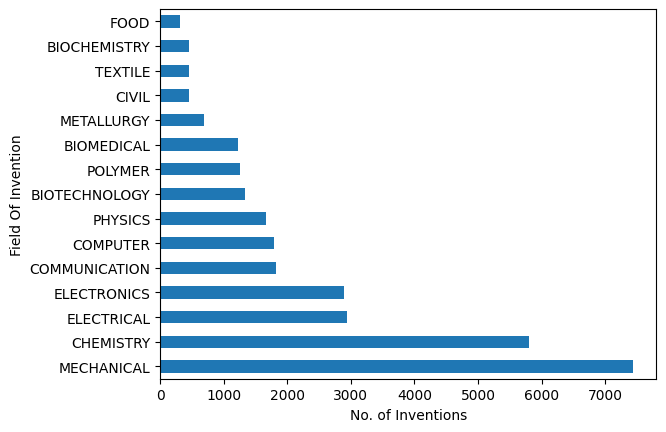

In [7]:
df['FIELD_OF_INVENTION'].value_counts().plot(kind='barh')
plt.xlabel('No. of Inventions')
plt.ylabel('Field Of Invention')
plt.show()

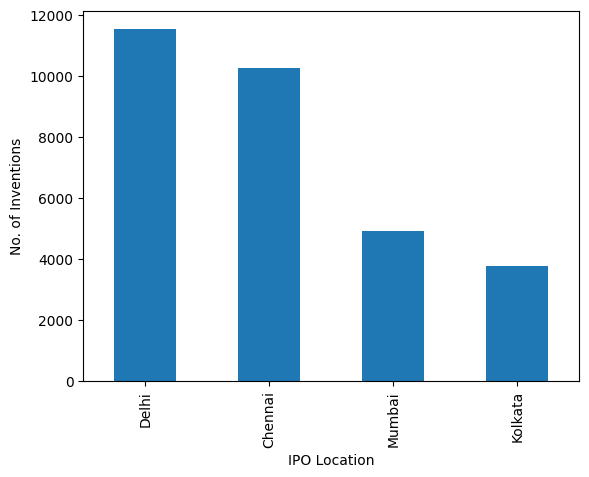

In [8]:
#plt.bar(df['IPO_LOCATION'].unique(), df['IPO_LOCATION'].value_counts())
df['IPO_LOCATION'].value_counts().plot(kind='bar')
plt.ylabel('No. of Inventions')
plt.xlabel('IPO Location')
plt.show()